In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import log
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore")

In [10]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7EFD-E000

 Directory of C:\Users\ChiranjeeviAR\Documents\excelr_project\project1\finaaaaaaaaaaaaaaal

19-12-2022  12:20    <DIR>          .
19-12-2022  12:20    <DIR>          ..
19-12-2022  12:20    <DIR>          .ipynb_checkpoints
19-12-2022  12:14    <DIR>          deployment_fb_prophet
19-12-2022  12:13    <DIR>          deployment_holt_winter
19-12-2022  12:20         1,957,922 eda.ipynb
26-08-2022  14:45            36,745 Gold_data.xlsx
19-12-2022  12:09    <DIR>          models
               2 File(s)      1,994,667 bytes
               6 Dir(s)  108,026,478,592 bytes free


In [11]:
df=pd.read_excel("Gold_data.xlsx")

In [12]:
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [1229]:
print(df.shape)
print(df.isna().sum())

(2182, 2)
date     0
price    0
dtype: int64


In [1230]:
print(df.dtypes)

date     datetime64[ns]
price           float64
dtype: object


In [1231]:
print(df.describe())

             price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000


In [1232]:
df.drop_duplicates(inplace=True)

In [1233]:
df.shape  

(2182, 2)

In [1234]:
data=pd.DatetimeIndex(df["date"]).year.unique()
data

Int64Index([2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='date')

In [1235]:
import numpy as np
gold=df.groupby(pd.DatetimeIndex(df["date"]).year).agg(np.mean)
gold

,price
date,
2016,2690.614162
2017,2626.676484
2018,2781.938082
2019,3150.210685
2020,4216.378689
2021,4266.871549


In [1236]:
gold.reset_index(inplace=True)

<AxesSubplot:xlabel='price', ylabel='Density'>

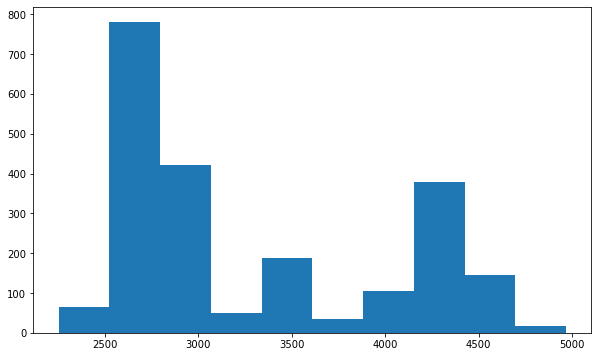

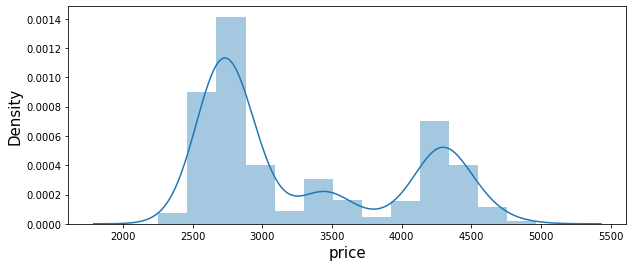

In [1237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df["price"])
import seaborn as sns
plt.figure(figsize=(10,4))
sns.distplot(df["price"])

In [1238]:
df["price"].kurt()

-1.2431585470189335

In [1239]:
df["price"].skew()

0.6373117447692479

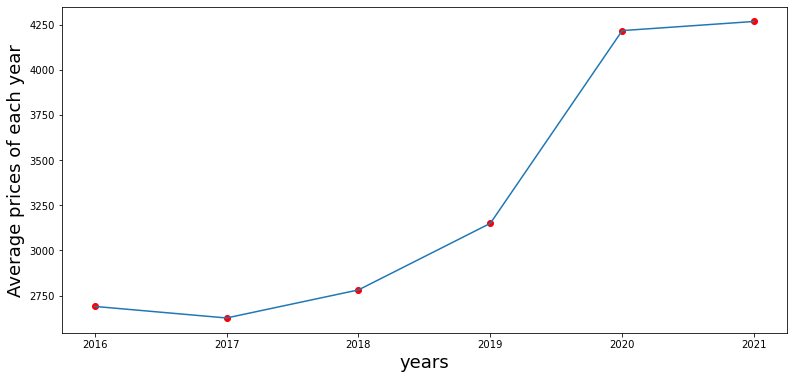

In [1240]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=18) 
plt.figure(figsize=(13,6))
plt.plot(gold.date,gold.price)
plt.xlabel("years")
plt.ylabel("Average prices of each year")
plt.scatter(gold.date,gold.price,c='red')

Text(0, 0.5, 'Price across the years')

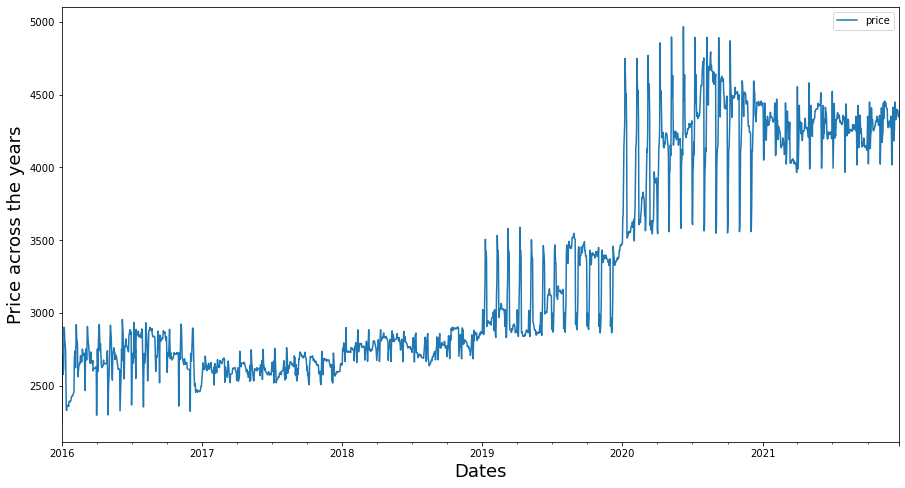

In [1241]:
df.plot(kind="line", x="date",y="price",figsize=(15,8))
plt.rc('axes', labelsize=18)
plt.xlabel("Dates")
plt.ylabel("Price across the years")

In [1242]:
df["year"]=df["date"].dt.year
df.head(2)

,date,price,year
0,2016-01-01,2252.6,2016
1,2016-01-02,2454.5,2016


In [1243]:
year_2016=df[df["year"]==2016]
year_2017=df[df["year"]==2017]
year_2018=df[df["year"]==2018]
year_2019=df[df["year"]==2019]
year_2020=df[df["year"]==2020]
year_2021=df[df["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year
 0 2016-01-01  2252.60  2016
 1 2016-01-02  2454.50  2016
 2 2016-01-03  2708.10  2016
 3 2016-01-04  2577.80  2016
 4 2016-01-05  2597.75  2016,
           date        price  year
 361 2016-12-27  2469.300000  2016
 362 2016-12-28  2484.300000  2016
 363 2016-12-29  2498.100000  2016
 364 2016-12-30  2497.800000  2016
 365 2016-12-31  2534.033333  2016)

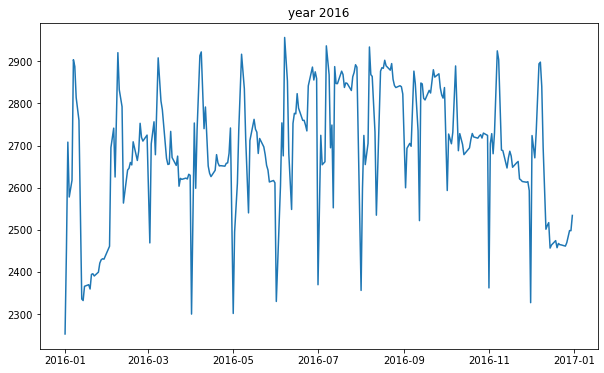

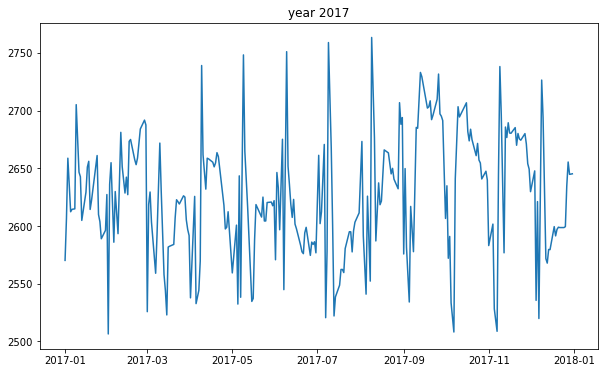

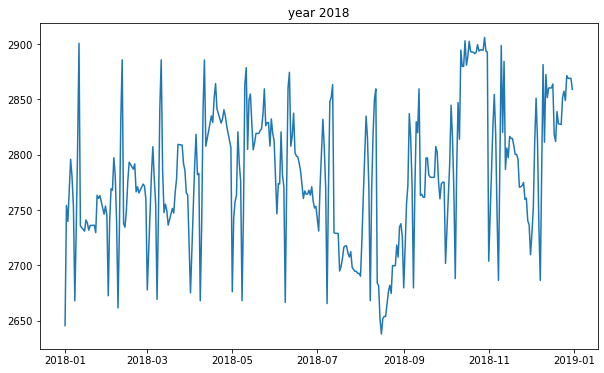

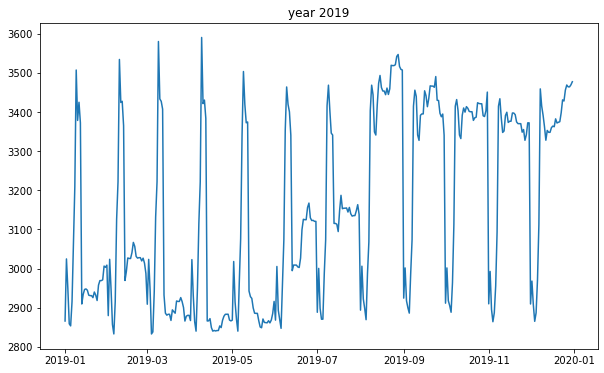

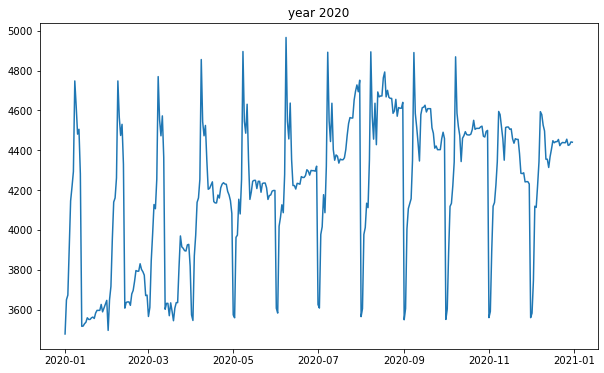

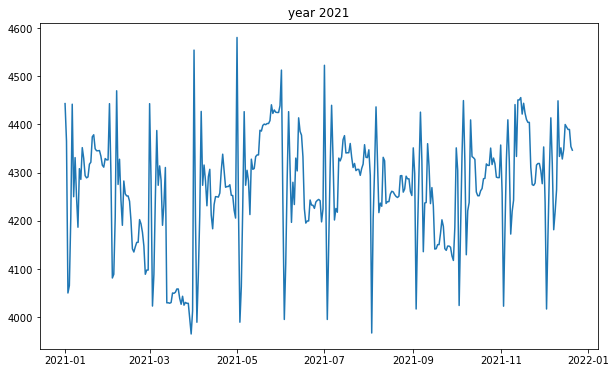

In [1244]:
# plotting each year:
plt.figure(figsize=(10,6))
plt.plot(year_2016["date"],year_2016["price"])
plt.title("year 2016")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2017["date"],year_2017["price"])
plt.title("year 2017")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2018["date"],year_2018["price"])
plt.title("year 2018")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2019["date"],year_2019["price"])
plt.title("year 2019")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2020["date"],year_2020["price"])
plt.title("year 2020")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2021["date"],year_2021["price"])
plt.title("year 2021")
plt.show()

In [1245]:
# fetching months:
df["month"]=df["date"].dt.month
df.head()

,date,price,year,month
0,2016-01-01,2252.60,2016,1
1,2016-01-02,2454.50,2016,1
2,2016-01-03,2708.10,2016,1
3,2016-01-04,2577.80,2016,1
4,2016-01-05,2597.75,2016,1


In [1246]:
year_2016=df[df["year"]==2016]
year_2017=df[df["year"]==2017]
year_2018=df[df["year"]==2018]
year_2019=df[df["year"]==2019]
year_2020=df[df["year"]==2020]
year_2021=df[df["year"]==2021]

In [1247]:
year_2016

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
...,...,...,...,...
361,2016-12-27,2469.300000,2016,12
362,2016-12-28,2484.300000,2016,12
363,2016-12-29,2498.100000,2016,12
364,2016-12-30,2497.800000,2016,12


In [1248]:
print(year_2016.shape)

(366, 4)


In [1249]:
# group by price based on month:
# 2016
y_2016=year_2016.groupby(["month"]).agg({"price":np.mean})
y_2016

,price
month,
1,2495.832258
2,2688.703448
3,2682.854839
4,2677.790000
5,2677.650000
6,2745.596667
7,2779.582258
8,2792.240323
9,2792.705000


In [1250]:
y_2016.reset_index(inplace=True)

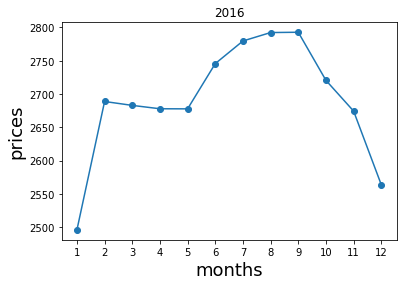

In [1251]:
plt.scatter(y_2016["month"], y_2016["price"])
plt.plot(y_2016["month"], y_2016["price"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2016")
plt.xticks(y_2016["month"])
plt.show()

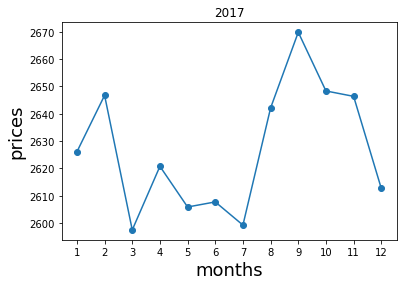

In [1252]:
# 2017
y_2017=year_2017.groupby(["month"]).agg({"price":np.mean})
y_2017.reset_index(inplace=True)
plt.scatter(y_2017["month"], y_2017["price"])
plt.plot(y_2017["month"], y_2017["price"])
plt.xticks(y_2017["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2017")
plt.show()

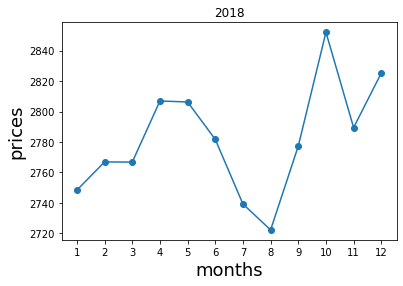

In [1253]:
# 2018:
y_2018=year_2018.groupby(["month"]).agg({"price":np.mean})
y_2018.reset_index(inplace=True)
plt.scatter(y_2018["month"], y_2018["price"])
plt.plot(y_2018["month"], y_2018["price"])
plt.xticks(y_2018["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2018")
plt.show()

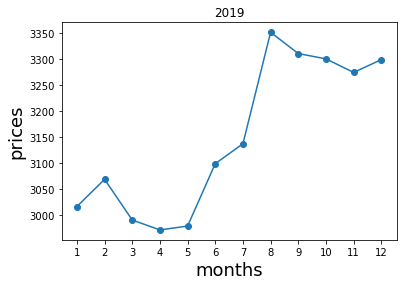

In [1254]:
# 2019:
y_2019=year_2019.groupby(["month"]).agg({"price":np.mean})
y_2019.reset_index(inplace=True)
plt.scatter(y_2019["month"], y_2019["price"])
plt.plot(y_2019["month"], y_2019["price"])
plt.xticks(y_2019["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2019")
plt.show()

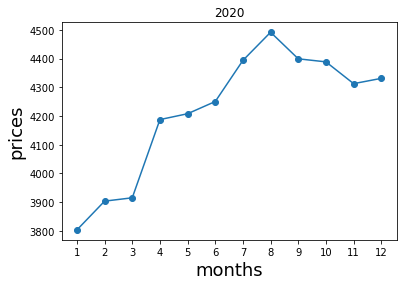

In [1255]:
# 2020:
y_2020=year_2020.groupby(["month"]).agg({"price":np.mean})
y_2020.reset_index(inplace=True)
plt.scatter(y_2020["month"], y_2020["price"])
plt.plot(y_2020["month"], y_2020["price"])
plt.xticks(y_2020["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2020")
plt.show()

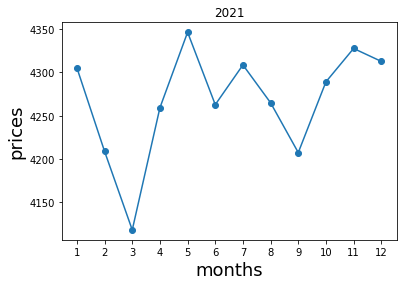

In [1256]:
# 2021:y_2021.reset_index(inplace=True)
y_2021=year_2021.groupby(["month"]).agg({"price":np.mean})
y_2021.reset_index(inplace=True)
plt.scatter(y_2021["month"], y_2021["price"])
plt.plot(y_2021["month"], y_2021["price"])
plt.xticks(y_2021["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2021")
plt.show()

In [1257]:
import numpy as np
kf=df.groupby(pd.DatetimeIndex(df["date"]).month).agg(np.mean)
kf

,price,year,month
date,,,
1,3165.796326,2018.500000,1.0
2,3214.831471,2018.494118,2.0
3,3178.425000,2018.500000,3.0
4,3253.865833,2018.500000,4.0
5,3270.410753,2018.500000,5.0
6,3291.177500,2018.500000,6.0
7,3326.265054,2018.500000,7.0
8,3377.567473,2018.500000,8.0
9,3359.573889,2018.500000,9.0


In [1258]:
kf.reset_index(inplace=True)

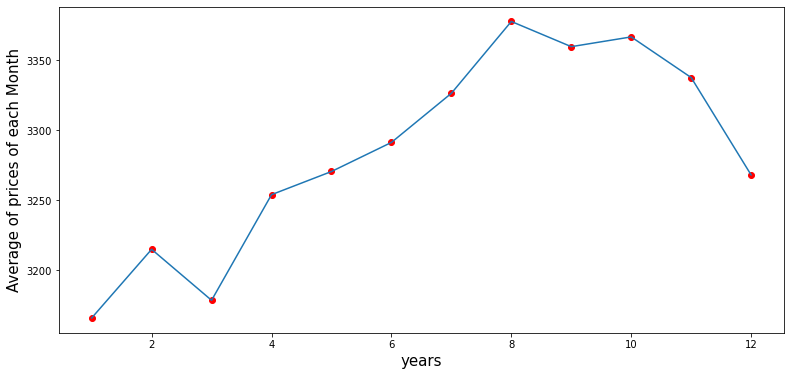

In [1259]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(kf.date,kf.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each Month")
plt.scatter(kf.date,kf.price,c='red')

In [1260]:
df["month"] = df.date.dt.strftime("%b") # month extraction
df["year"] = df.date.dt.strftime("%Y") # year extraction

In [1261]:
df

,date,price,year,month
0,2016-01-01,2252.60,2016,Jan
1,2016-01-02,2454.50,2016,Jan
2,2016-01-03,2708.10,2016,Jan
3,2016-01-04,2577.80,2016,Jan
4,2016-01-05,2597.75,2016,Jan
...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec
2178,2021-12-18,4389.50,2021,Dec
2179,2021-12-19,4389.50,2021,Dec
2180,2021-12-20,4354.10,2021,Dec


In [1262]:
months = pd.get_dummies(df['month']) 
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [1263]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [1264]:
Data = pd.concat([df,months],axis=1) 

In [1265]:
Data.head()

,date,price,year,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

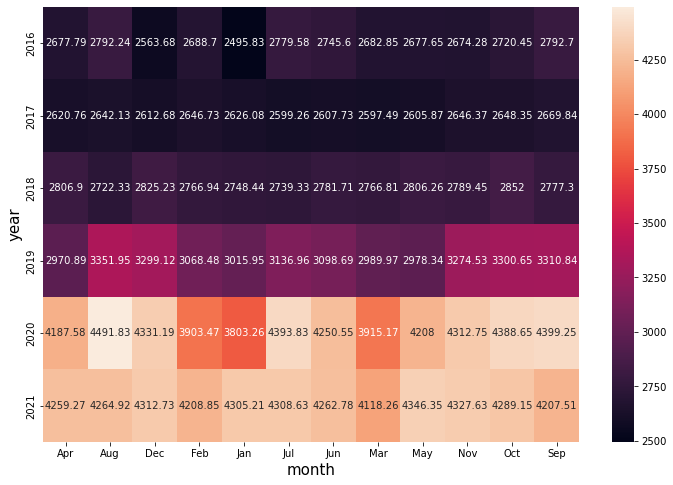

In [1266]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Data,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='price'>

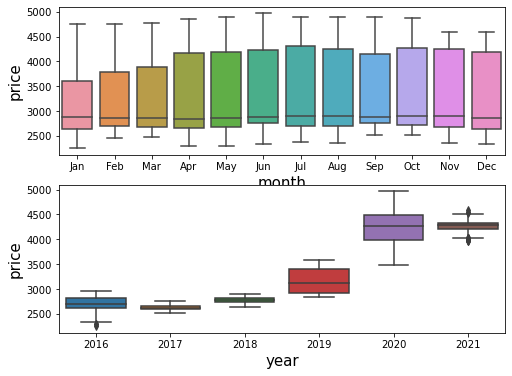

In [1267]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="price",data= Data)
plt.subplot(212)
sns.boxplot(x="year",y="price",data=Data)

<AxesSubplot:xlabel='year', ylabel='price'>

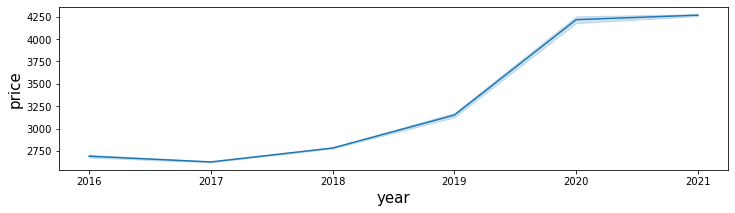

In [1268]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="price",data=Data)

In [1269]:
df['price_sqrt'] = (df['price'])**(1/2)
df['price_log'] = log(df['price'])
df['price_crt']=(df['price'])**(1/3)

In [1270]:
df['t'] =1

In [1271]:
df

,date,price,year,month,price_sqrt,price_log,price_crt,t
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,13.108752,1
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,13.489246,1
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,13.938677,1
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,13.711440,1
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,13.746721,1
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,66.290271,8.388086,16.379471,1
2178,2021-12-18,4389.50,2021,Dec,66.253302,8.386971,16.373380,1
2179,2021-12-19,4389.50,2021,Dec,66.253302,8.386971,16.373380,1
2180,2021-12-20,4354.10,2021,Dec,65.985604,8.378873,16.329246,1


<AxesSubplot:xlabel='date'>

<Figure size 1440x432 with 0 Axes>

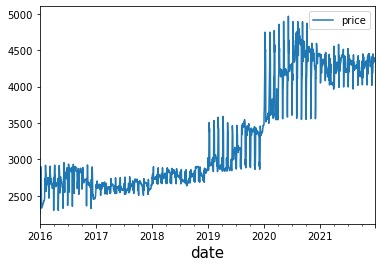

In [1272]:
plt.figure(figsize=(20,6))
df.plot(x = 'date',y = 'price')


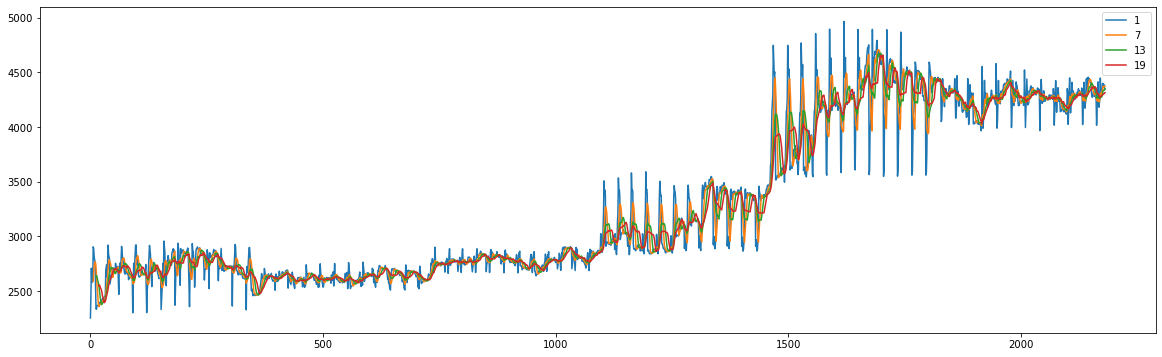

In [1391]:
plt.figure(figsize=(20,6))
for i in range(1,24,6):
    df["price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [1274]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 2160x720 with 0 Axes>

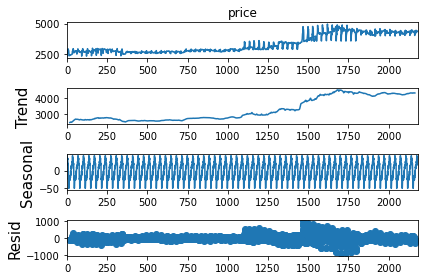

In [1275]:
plt.figure(figsize=(30,10))
decompose_ts_add = seasonal_decompose(df["price"],period=34)
decompose_ts_add.plot()
plt.show()

<AxesSubplot:xlabel='date'>

<Figure size 1440x432 with 0 Axes>

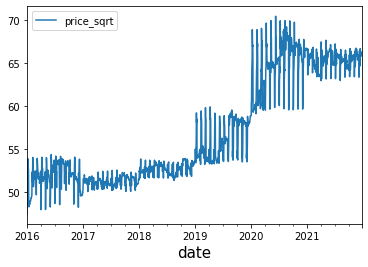

In [1276]:
plt.figure(figsize=(20,6))
df.plot(x = 'date',y = 'price_sqrt')

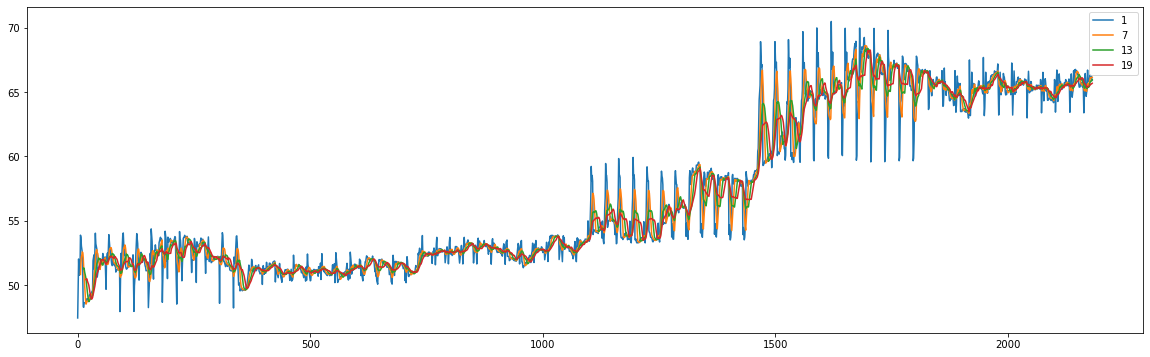

In [1277]:
plt.figure(figsize=(20,6))
for i in range(1,24,6):
    df["price_sqrt"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Figure size 2160x720 with 0 Axes>

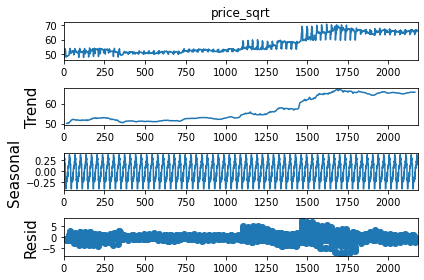

In [1278]:
plt.figure(figsize=(30,10))
decompose_ts_add = seasonal_decompose(df["price_sqrt"],period=34)
decompose_ts_add.plot()
plt.show()

<AxesSubplot:xlabel='date'>

<Figure size 1440x432 with 0 Axes>

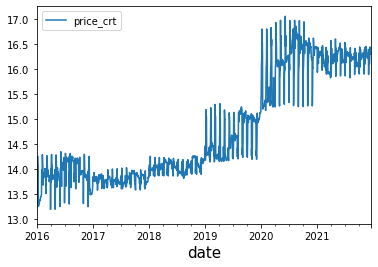

In [1279]:
plt.figure(figsize=(20,6))
df.plot(x = 'date',y = 'price_crt')

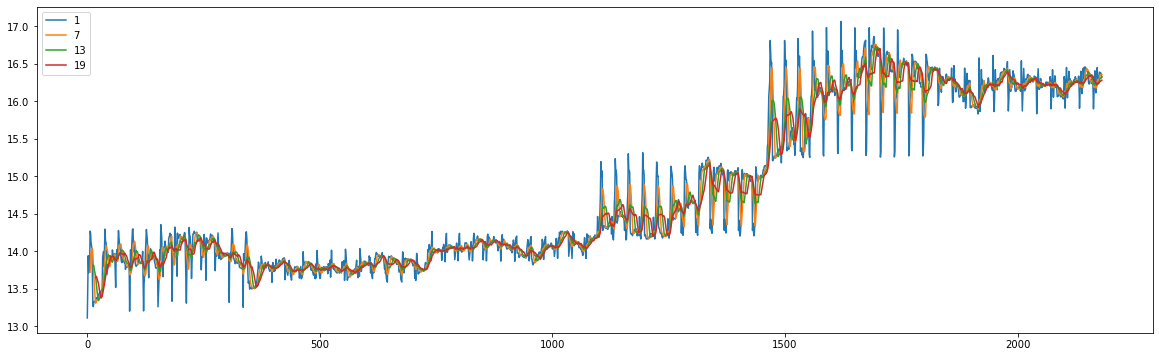

In [1280]:
plt.figure(figsize=(20,6))
for i in range(1,24,6):
    df["price_crt"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Figure size 2160x720 with 0 Axes>

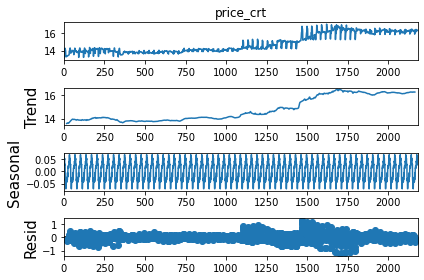

In [1281]:
plt.figure(figsize=(30,10))
decompose_ts_add = seasonal_decompose(df["price_crt"],period=34)
decompose_ts_add.plot()
plt.show()

<AxesSubplot:xlabel='date'>

<Figure size 1440x432 with 0 Axes>

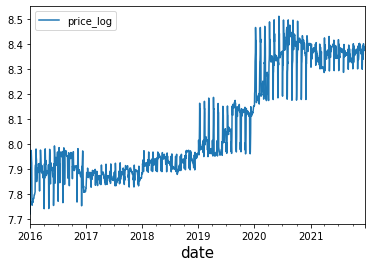

In [1282]:
plt.figure(figsize=(20,6))
df.plot(x = 'date',y = 'price_log')

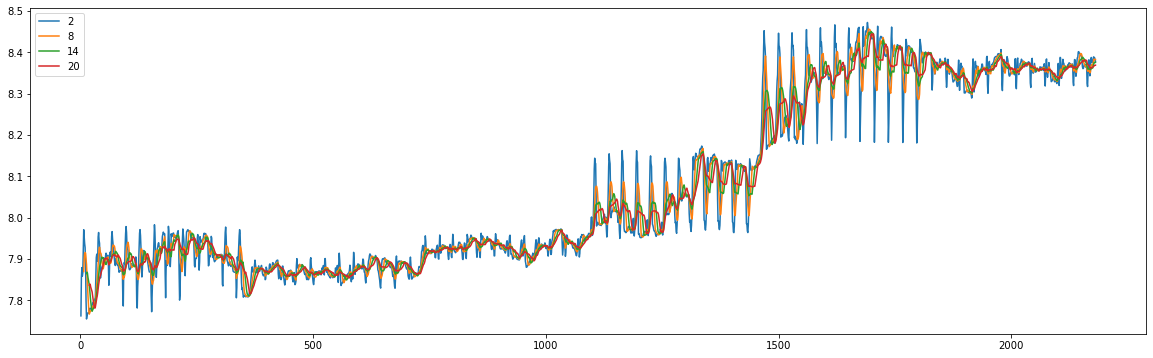

In [1283]:
plt.figure(figsize=(20,6))
for i in range(2,24,6):
    df["price_log"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Figure size 2160x720 with 0 Axes>

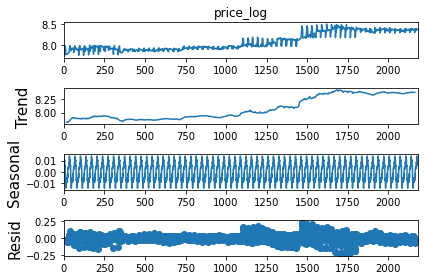

In [1284]:
plt.figure(figsize=(30,10))
decompose_ts_add = seasonal_decompose(df["price_log"],period=34)
decompose_ts_add.plot()
plt.show()

In [1385]:
df['price_diff'] = df['price']-df['price'].shift(1)


In [1286]:
k=1
for i in range(0,2183):
  df.t[i] =k;
  k = k+1;

In [1287]:
df['t_square'] = df['t']**2

In [1288]:
df

,date,price,year,month,price_sqrt,price_log,price_crt,t,price_diff,t_square
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,13.108752,1,NaN,1
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,13.489246,2,201.90,4
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,13.938677,3,253.60,9
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,13.711440,4,-130.30,16
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,13.746721,5,19.95,25
...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,66.290271,8.388086,16.379471,2178,-5.40,4743684
2178,2021-12-18,4389.50,2021,Dec,66.253302,8.386971,16.373380,2179,-4.90,4748041
2179,2021-12-19,4389.50,2021,Dec,66.253302,8.386971,16.373380,2180,0.00,4752400
2180,2021-12-20,4354.10,2021,Dec,65.985604,8.378873,16.329246,2181,-35.40,4756761


In [1289]:
months = pd.get_dummies(df['month']) 
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [1290]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [1291]:
df = pd.concat([df,months],axis=1) 

In [1389]:
df.columns

Index(['date', 'price', 'year', 'month', 'price_sqrt', 'price_log',
       'price_crt', 't', 'price_diff', 't_square', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [1390]:
df.head(5)

,date,price,year,month,price_sqrt,price_log,price_crt,t,price_diff,t_square,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,13.108752,1,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,13.489246,2,201.90,4,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,13.938677,3,253.60,9,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,13.711440,4,-130.30,16,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,13.746721,5,19.95,25,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

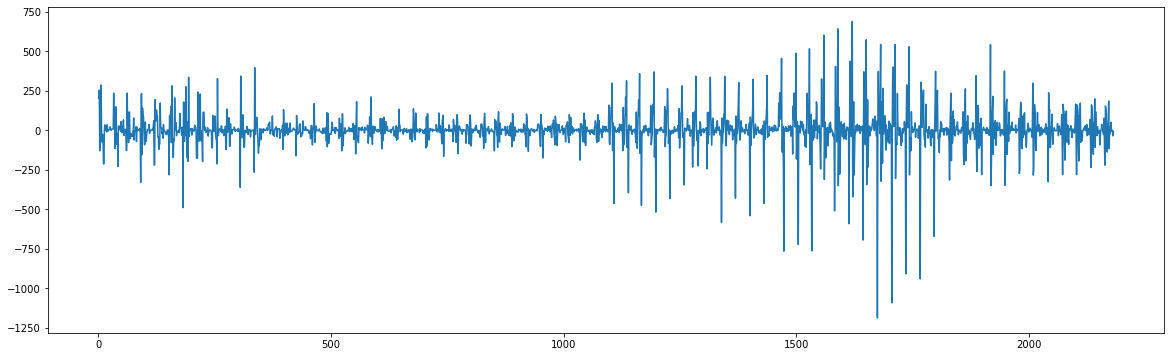

In [1293]:
plt.figure(figsize=(20,6))
df['price_diff'].dropna().plot()

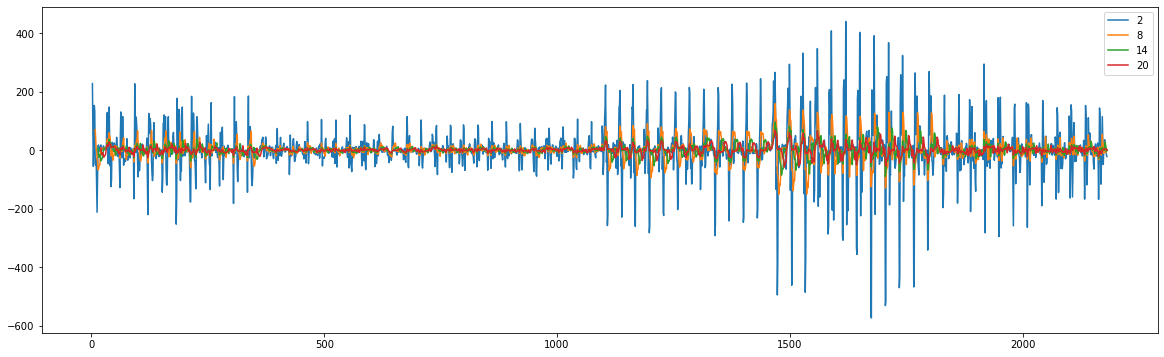

In [1294]:
plt.figure(figsize=(20,6))
for i in range(2,24,6):
    df["price_diff"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [1295]:
from statsmodels.tsa.stattools import adfuller

In [1296]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [1297]:
adf_test(df['price_diff'].dropna())

ADF Statistics: -21.66454212724443
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Figure size 1440x432 with 0 Axes>

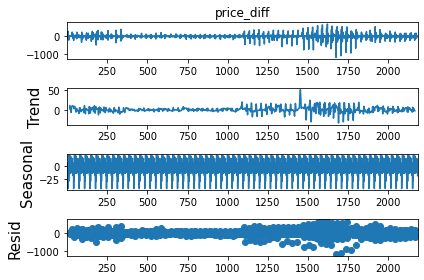

In [1298]:
plt.figure(figsize=(20,6))
decompose_ts_add = seasonal_decompose(df["price_diff"].dropna(),period=34)
decompose_ts_add.plot()
plt.show()